In [57]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [58]:
calories = pd.read_csv('calories.csv')
exercise_data = pd.read_csv('exercise.csv')

In [59]:
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [60]:
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


<Axes: >

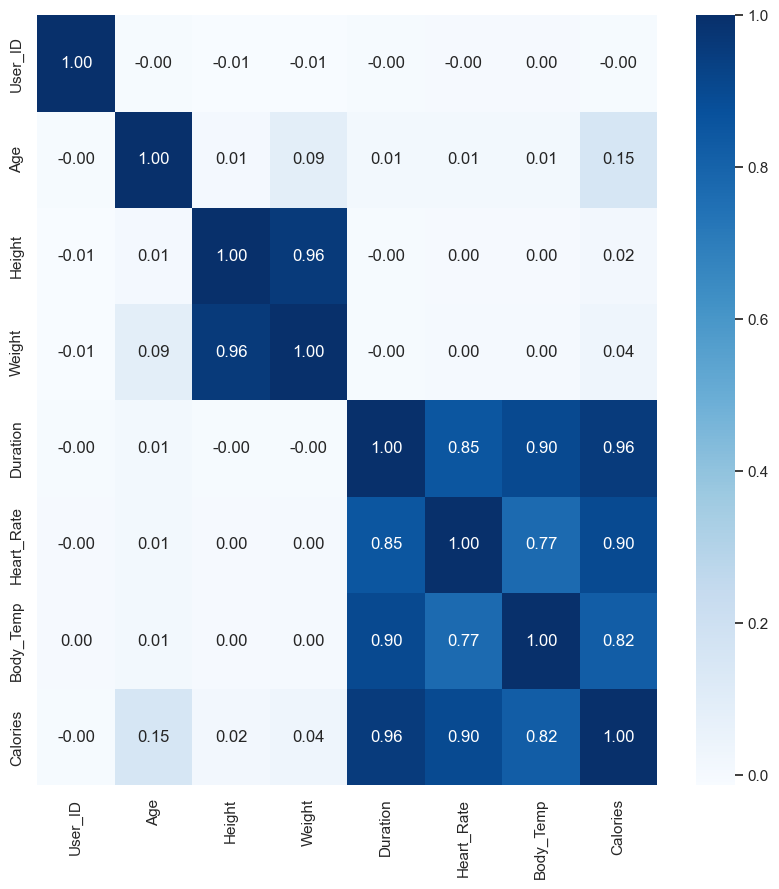

In [61]:
calories_data_numeric = calories_data.select_dtypes(include='number')
correlation = calories_data_numeric.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, annot=True, fmt='.2f' , cmap='Blues')


In [62]:
# Convert gender to numerical values
calories_data['Gender'] = calories_data['Gender'].map({'male': 0, 'female': 1})

In [63]:
calories_data

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,1,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,1,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,1,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,0,78,193.0,97.0,2.0,84.0,38.3,11.0


In [64]:
# Separate target and features and delete ID column
X = calories_data.drop(columns=['Calories', 'User_ID'])
y = calories_data['Calories']

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
columns_for_scale = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate']
X[columns_for_scale] = scaler.fit_transform(X[columns_for_scale])

In [67]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,1.484726,1.089582,1.265909,1.619127,0.989404,40.8
1,1,-1.342179,-0.593726,-0.995458,-0.183990,-0.158461,40.3
2,0,1.543620,0.318066,0.268247,-1.265861,-0.784569,38.7
3,1,-0.517665,0.318066,-0.263839,-0.304198,0.467647,40.5
4,1,-0.929922,-1.435380,-1.128480,-0.664821,-1.515029,39.8
...,...,...,...,...,...,...,...
14995,1,-1.342179,1.299996,0.733822,-0.544614,-0.367164,40.4
14996,1,-0.929922,-0.663864,-0.662904,-1.145653,-1.097623,39.2
14997,1,0.012379,-1.084691,-1.128480,0.056426,-0.575866,40.1
14998,0,2.073665,1.299996,1.465441,-1.626484,-1.201975,38.3


In [68]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [69]:
model = XGBRegressor()

In [70]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
y_pred = model.predict(X_test)

In [72]:
mae = metrics.mean_absolute_error(y_test, y_pred)


In [73]:
print(mae)

1.4833678883314132
